In [1]:
# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime, timedelta
import talib

In [2]:


data_path = 'data/Kraken_OHLCVT'
# full_path = data_path + table
# df = pd.read_csv(full_path, header=None)
# df

In [3]:
import os

file_names = os.listdir(data_path)

btc = [f for f in file_names if "BTC" in f]
# eth = [f for f in file_names if "ETH" in f.upper()]
# sol = [f for f in file_names if "SOL" in f.upper()]

In [4]:
df = pd.read_csv(data_path + "/XBTUSDC_1.csv", header=None)
# df["timestamp"] = pd.to_datetime(df[0], unit='s') 
# X = df[[4, 'timestamp']]
# X = df[[0, 4]]
df = df.drop(columns=[6])


#above march 9 for now
df = df[df[0] >= 1710028800]
df

,0,1,2,3,4,5
681154,1710028980,68469.45,68469.45,68469.45,68469.45,0.000100
681155,1710029040,68468.90,68468.90,68468.90,68468.90,0.001000
681156,1710029280,68474.69,68474.69,68474.69,68474.69,0.003078
681157,1710029340,68457.89,68459.92,68454.49,68459.92,0.007303
681158,1710029400,68458.29,68458.29,68458.29,68458.29,0.000455
...,...,...,...,...,...,...
780991,1727739840,63002.95,63002.95,63002.95,63002.95,0.002246
780992,1727739900,63023.75,63043.40,63023.75,63043.40,0.024866
780993,1727739960,63157.30,63161.83,63157.30,63161.83,0.003102
780994,1727740020,63215.71,63215.71,63215.71,63215.71,0.000800


In [5]:
x = df.to_numpy()

# Set print options for better readability
np.set_printoptions(precision=2, suppress=True)

# Pretty print the array
print("Formatted NumPy Array:")
print(x)

Formatted NumPy Array:
[[1.71e+09 6.85e+04 6.85e+04 6.85e+04 6.85e+04 1.00e-04]
 [1.71e+09 6.85e+04 6.85e+04 6.85e+04 6.85e+04 1.00e-03]
 [1.71e+09 6.85e+04 6.85e+04 6.85e+04 6.85e+04 3.08e-03]
 ...
 [1.73e+09 6.32e+04 6.32e+04 6.32e+04 6.32e+04 3.10e-03]
 [1.73e+09 6.32e+04 6.32e+04 6.32e+04 6.32e+04 8.00e-04]
 [1.73e+09 6.33e+04 6.33e+04 6.33e+04 6.33e+04 1.00e-04]]


In [6]:
#OVERLAP STUDIES:

def calculate_bollinger_bands(data, time_period=20):
    close = data[:, 4]  # Close prices
    upperband, middleband, lowerband = talib.BBANDS(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], upperband, middleband, lowerband))

def calculate_dema(data, time_period=30):
    close = data[:, 4]  # Close prices
    dema = talib.DEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dema))

def calculate_ema(data, time_period=30):
    close = data[:, 4]  # Close prices
    ema = talib.EMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], ema))

def calculate_hilbert_trendline(data):
    close = data[:, 4]  # Close prices
    h_trendline = talib.HT_TRENDLINE(close)
    return np.column_stack((data[:, 0], h_trendline))

def calculate_kamam(data, time_period=30):
    close = data[:, 4]  # Close prices
    kmam = talib.KAMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], kmam))

def calculate_midpoint(data, time_period=14):
    close = data[:, 4]  # Close prices
    midpoint = talib.MIDPOINT(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], midpoint))

def calculate_midprice(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    midprice = talib.MIDPRICE(high, low, timeperiod=time_period)
    return np.column_stack((data[:, 0], midprice))

def calculate_sar(data, acceleration=0.02, maximum=0.2):
    high = data[:, 2]  # High prices
    low = data[:, 3]  # Low prices
    sar = talib.SAR(high, low, acceleration=acceleration, maximum=maximum)
    return np.column_stack((data[:, 0], sar))

def calculate_sma(data, time_period=30):
    close = data[:, 4]  # Close prices
    sma = talib.SMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], sma))

def calculate_tema(data, time_period=30):
    close = data[:, 4]  # Close prices
    tema = talib.TEMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], tema))

def calculate_wma(data, time_period=30):
    close = data[:, 4]  # Close prices
    wma = talib.WMA(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], wma))

In [7]:
#momentum indicators:
def calculate_adx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adx = talib.ADX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adx))

def calculate_adxr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    adxr = talib.ADXR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], adxr))

def calculate_apO(data):
    close = data[:, 4] # Close prices
    apo = talib.APO(close)
    return np.column_stack((data[:, 0], apo))

def calculate_aroonosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    aroonosc = talib.AROONOSC(high, low)
    return np.column_stack((data[:, 0], aroonosc))

def calculate_bop(data):
    open_price = data[:, 1]  # Open prices
    high = data[:, 2]        # High prices
    low = data[:, 3]         # Low prices
    close = data[:, 4]       # Close prices
    bop = talib.BOP(open_price, high, low, close)
    return np.column_stack((data[:, 0], bop))

def calculate_cci(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    cci = talib.CCI(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cci))

def calculate_cmo(data, time_period=14):
    close = data[:, 4]  # Close prices
    cmo = talib.CMO(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], cmo))

def calculate_dx(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    dx = talib.DX(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], dx))

def calculate_macd(data):
    close = data[:, 4]  # Close prices
    macd, macdsignal, macdhist = talib.MACD(close)
    return np.column_stack((data[:, 0], macd, macdsignal, macdhist))

def calculate_minus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    minus_di = talib.MINUS_DI(high, low, close)
    return np.column_stack((data[:, 0], minus_di))

def calculate_minus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    minus_dm = talib.MINUS_DM(high, low)
    return np.column_stack((data[:, 0], minus_dm))

def calculate_momentum(data, time_period=10):
    close = data[:, 4]  # Close prices
    momentum = talib.MOM(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], momentum))

def calculate_plus_di(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    plus_di = talib.PLUS_DI(high, low, close)
    return np.column_stack((data[:, 0], plus_di))

def calculate_plus_dm(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    plus_dm = talib.PLUS_DM(high, low)
    return np.column_stack((data[:, 0], plus_dm))

def calculate_ppo(data):
    close = data[:, 4]  # Close prices
    ppo = talib.PPO(close)
    return np.column_stack((data[:, 0], ppo))

def calculate_roc(data, time_period=10):
    close = data[:, 4]  # Close prices
    roc = talib.ROC(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], roc))

def calculate_rocp(data):
    close = data[:, 4]  # Close prices
    rocp = talib.ROCP(close)
    return np.column_stack((data[:, 0], rocp))

def calculate_rocr(data):
    close = data[:, 4]  # Close prices
    rocr = talib.ROCR(close)
    return np.column_stack((data[:, 0], rocr))

def calculate_rocr100(data):
    close = data[:, 4]  # Close prices
    rocr100 = talib.ROCR100(close)
    return np.column_stack((data[:, 0], rocr100))

def calculate_rsi(data, time_period=14):
    close = data[:, 4]  # Close prices
    rsi = talib.RSI(close, timeperiod=time_period)
    return np.column_stack((data[:, 0], rsi))

def calculate_stochastic(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    slowk, slowd = talib.STOCHF(high, low, close)
    return np.column_stack((data[:, 0], slowk, slowd))

def calculate_trix(data):
    close = data[:, 4]  # Close prices
    trix = talib.TRIX(close)
    return np.column_stack((data[:, 0], trix))

def calculate_ultosc(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    ultosc = talib.ULTOSC(high, low, close)
    return np.column_stack((data[:, 0], ultosc))

def calculate_willr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    willr = talib.WILLR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], willr))

In [8]:
#volatility indicators:

def calculate_atr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    atr = talib.ATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], atr))

def calculate_natr(data, time_period=14):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    close = data[:, 4] # Close prices
    natr = talib.NATR(high, low, close, timeperiod=time_period)
    return np.column_stack((data[:, 0], natr))

def calculate_trange(data):
    high = data[:, 2]  # High prices
    low = data[:, 3]   # Low prices
    prev_close = np.roll(data[:, 4], 1)  # Previous close prices (shifted)
    prev_close[0] = low[0]  # Handle the first element
    true_range = np.maximum(high - low, np.maximum(np.abs(high - prev_close), np.abs(low - prev_close)))
    return np.column_stack((data[:, 0], true_range))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# atr_result = calculate_atr(data)
# natr_result = calculate_natr(data)
# trange_result = calculate_trange(data)


In [9]:
# PATTERN RECOGNITION:
import numpy as np
# import talib

def calculate_two_crows(data):
    two_crows = talib.CDL2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], two_crows))

def calculate_three_black_crows(data):
    three_black_crows = talib.CDL3BLACKCROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_black_crows))

def calculate_three_inside(data):
    three_inside = talib.CDL3INSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_inside))

def calculate_three_line_strike(data):
    three_line_strike = talib.CDL3LINESTRIKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_line_strike))

def calculate_three_outside(data):
    three_outside = talib.CDL3OUTSIDE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_outside))

def calculate_three_stars_in_south(data):
    three_stars_in_south = talib.CDL3STARSINSOUTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_stars_in_south))

def calculate_three_advancing_white(data):
    three_advancing_white = talib.CDL3WHITESOLDIERS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], three_advancing_white))

def calculate_abandoned_baby(data):
    abandoned_baby = talib.DLABANDONEDBABY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], abandoned_baby))

def calculate_advance_block(data):
    advance_block = talib.CDLADVANCEBLOCK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], advance_block))

def calculate_belt_hold(data):
    belt_hold = talib.CDLBELTHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], belt_hold))

def calculate_breakaway(data):
    breakaway = talib.CDLBREAKAWAY(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], breakaway))

def calculate_closing_marubozu(data):
    closing_marubozu = talib.CDLCLOSINGMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], closing_marubozu))

def calculate_concealing_baby_swallow(data):
    concealing_baby_swallow = talib.DLCONCEALBABYSWALL(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], concealing_baby_swallow))

def calculate_counterattack(data):
    counterattack = talib.CDLCOUNTERATTACK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], counterattack))

def calculate_dark_cloud_cover(data):
    dark_cloud_cover = talib.CLDARKCLOUDCOVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dark_cloud_cover))

def calculate_doji(data):
    doji = talib.DLDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji))

def calculate_doji_star(data):
    doji_star = talib.CDLDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], doji_star))

def calculate_dragonfly_doji(data):
    dragonfly_doji = talib.DLDRAGONFLYDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], dragonfly_doji))

def calculate_engulfing(data):
    engulfing = talib.DLENGULFING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], engulfing))

def calculate_evening_doji_star(data):
    evening_doji_star = talib.CDLEVENINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_doji_star))

def calculate_evening_star(data):
    evening_star = talib.CDLEVENINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], evening_star))

def calculate_up_down_gap_side(data):
    up_down_gap_side = talib.CDLGAPSIDESIDEWHITE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], up_down_gap_side))

def calculate_gravestone_doji(data):
    gravestone_doji = talib.CDLGRAVESTONEDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], gravestone_doji))

def calculate_hammer(data):
    hammer = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hammer))

def calculate_hanging_man(data):
    hanging_man = talib.CDLHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hanging_man))

def calculate_harami(data):
    harami = talib.CDLHARAMI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami))

def calculate_harami_cross(data):
    harami_cross = talib.DLHARAMICROSS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], harami_cross))

def calculate_high_wave(data):
    high_wave = talib.CDLHIGHWAVE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], high_wave))

def calculate_hikkake(data):
    hikkake = talib.CDLHIKKAKE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], hikkake))

def calculate_modified_hikkake(data):
    modified_hikkake = talib.CDLHIKKAKEMOD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], modified_hikkake))

def calculate_homing_pigeon(data):
    homing_pigeon = talib.CDLHOMINGPIGEON(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], homing_pigeon))

def calculate_identical_three_crows(data):
    identical_three_crows = talib.CDLIDENTICAL3CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], identical_three_crows))

def calculate_in_neck(data):
    in_neck = talib.CDLINNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], in_neck))

def calculate_inverted_hammer(data):
    inverted_hammer = talib.DLINVERTEDHAMMER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], inverted_hammer))

def calculate_kicking(data):
    kicking = talib.DLKICKING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking))

def calculate_kicking_by_length(data):
    kicking_by_length = talib.CDLKICKINGBYLENGTH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], kicking_by_length))

def calculate_ladder_bottom(data):
    ladder_bottom = talib.CDLLADDERBOTTOM(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], ladder_bottom))

def calculate_long_legged_doji(data):
    long_legged_doji = talib.CDLLONGLEGGEDDOJI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_legged_doji))

def calculate_long_line(data):
    long_line = talib.CDLLONGLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], long_line))

def calculate_marubozu(data):
    marubozu = talib.CDLMARUBOZU(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], marubozu))

def calculate_matching_low(data):
    matching_low = talib.CDLMATCHINGLOW(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], matching_low))

def calculate_mat_hold(data):
    mat_hold = talib.CDLMATHOLD(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], mat_hold))

def calculate_morning_doji_star(data):
    morning_doji_star = talib.CDLMORNINGDOJISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_doji_star))

def calculate_morning_star(data):
    morning_star = talib.CDLMORNINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], morning_star))

def calculate_on_neck(data):
    on_neck = talib.CDLONNECK(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], on_neck))

def calculate_piercing(data):
    piercing = talib.CDLPIERCING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], piercing))

def calculate_rickshaw_man(data):
    rickshaw_man = talib.DLRICKSHAWMAN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rickshaw_man))

def calculate_rising_falling_three_methods(data):
    rising_falling_three_methods = talib.CDLRISEFALL3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], rising_falling_three_methods))

def calculate_separating_lines(data):
    separating_lines = talib.CDLSEPARATINGLINES(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], separating_lines))

def calculate_shooting_star(data):
    shooting_star = talib.CDLSHOOTINGSTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], shooting_star))

def calculate_short_line(data):
    short_line = talib.CDLSHORTLINE(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], short_line))

def calculate_spinning_top(data):
    spinning_top = talib.CDLSPINNINGTOP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], spinning_top))

def calculate_stalled_pattern(data):
    stalled_pattern = talib.CDLSTALLEDPATTERN(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stalled_pattern))

def calculate_stick_sandwich(data):
    stick_sandwich = talib.CDLSTICKSANDWICH(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], stick_sandwich))

def calculate_takuri(data):
    takuri = talib.CDLTAKURI(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], takuri))

def calculate_tasuki_gap(data):
    tasuki_gap = talib.CDLTASUKIGAP(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tasuki_gap))

def calculate_thrusting(data):
    thrusting = talib.CDLTHRUSTING(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], thrusting))

def calculate_tristar(data):
    tristar = talib.DLTRISTAR(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], tristar))

def calculate_unique_three_river(data):
    unique_three_river = talib.CDLUNIQUE3RIVER(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], unique_three_river))

def calculate_upside_gap_two_crows(data):
    upside_gap_two_crows = talib.CDLUPSIDEGAP2CROWS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_gap_two_crows))

def calculate_upside_downside_gap_three_methods(data):
    upside_downside_gap_three_methods = talib.CDLXSIDEGAP3METHODS(data[:, 1], data[:, 2], data[:, 3], data[:, 4])
    return np.column_stack((data[:, 0], upside_downside_gap_three_methods))

# Example usage:
# data = np.array([[timestamp, open, high, low, close, volume], ...])
# two_crows_result = calculate_two_crows(data)
# three_black_crows_result = calculate_three_black_crows(data)


In [10]:
#CYCLE INDICATORS:
import numpy as np


def calculate_hilbert_transform_dominant_cycle_period(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Period.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle period.
    """
    dcp = talib.HT_DCPERIOD(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dcp))

def calculate_hilbert_transform_dominant_cycle_phase(data):
    """
    Calculates the Hilbert Transform - Dominant Cycle Phase.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated cycle phase.
    """
    dph = talib.HT_DCPHASE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], dph))

def calculate_hilbert_transform_trend_mode(data):
    """
    Calculates the Hilbert Transform - Trend vs Cycle Mode.
    
    Parameters:
        data (np.ndarray): A 6D array with the following fields:
                           [timestamp, open, high, low, close, volume]
    
    Returns:
        np.ndarray: A NumPy array with the timestamp and the calculated trend mode.
    """
    trend_mode = talib.HT_TRENDMODE(data[:, 4])  # Using close prices for calculation
    return np.column_stack((data[:, 0], trend_mode))


In [11]:

functions = [name for name, obj in globals().items() if callable(obj)]
technicals = [f for f in functions if "calculate" in f]

for t in technicals:
    name = ''.join(t.split("_")[1:])

    print(f'{name} = {t}(x)')



bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
na

In [12]:
bollingerbands = calculate_bollinger_bands(x)
dema = calculate_dema(x)
ema = calculate_ema(x)
hilberttrendline = calculate_hilbert_trendline(x)
kamam = calculate_kamam(x)
midpoint = calculate_midpoint(x)
midprice = calculate_midprice(x)
sar = calculate_sar(x)
sma = calculate_sma(x)
tema = calculate_tema(x)
wma = calculate_wma(x)
adx = calculate_adx(x)
adxr = calculate_adxr(x)
apO = calculate_apO(x)
aroonosc = calculate_aroonosc(x)
bop = calculate_bop(x)
cci = calculate_cci(x)
cmo = calculate_cmo(x)
dx = calculate_dx(x)
macd = calculate_macd(x)
minusdi = calculate_minus_di(x)
minusdm = calculate_minus_dm(x)
momentum = calculate_momentum(x)
plusdi = calculate_plus_di(x)
plusdm = calculate_plus_dm(x)
ppo = calculate_ppo(x)
roc = calculate_roc(x)
rocp = calculate_rocp(x)
rocr = calculate_rocr(x)
rocr100 = calculate_rocr100(x)
rsi = calculate_rsi(x)
stochastic = calculate_stochastic(x)
trix = calculate_trix(x)
ultosc = calculate_ultosc(x)
willr = calculate_willr(x)
atr = calculate_atr(x)
natr = calculate_natr(x)
trange = calculate_trange(x)
twocrows = calculate_two_crows(x)
threeblackcrows = calculate_three_black_crows(x)
threeinside = calculate_three_inside(x)
threelinestrike = calculate_three_line_strike(x)
threeoutside = calculate_three_outside(x)
threestarsinsouth = calculate_three_stars_in_south(x)
threeadvancingwhite = calculate_three_advancing_white(x)
# abandonedbaby = calculate_abandoned_baby(x)
advanceblock = calculate_advance_block(x)
belthold = calculate_belt_hold(x)
breakaway = calculate_breakaway(x)
closingmarubozu = calculate_closing_marubozu(x)
# concealingbabyswallow = calculate_concealing_baby_swallow(x)
counterattack = calculate_counterattack(x)
# darkcloudcover = calculate_dark_cloud_cover(x)
# doji = calculate_doji(x)
dojistar = calculate_doji_star(x)
# dragonflydoji = calculate_dragonfly_doji(x)
# engulfing = calculate_engulfing(x)
eveningdojistar = calculate_evening_doji_star(x)
eveningstar = calculate_evening_star(x)
updowngapside = calculate_up_down_gap_side(x)
gravestonedoji = calculate_gravestone_doji(x)
hammer = calculate_hammer(x)
hangingman = calculate_hanging_man(x)
harami = calculate_harami(x)
# haramicross = calculate_harami_cross(x)
highwave = calculate_high_wave(x)
hikkake = calculate_hikkake(x)
modifiedhikkake = calculate_modified_hikkake(x)
homingpigeon = calculate_homing_pigeon(x)
identicalthreecrows = calculate_identical_three_crows(x)
inneck = calculate_in_neck(x)
# invertedhammer = calculate_inverted_hammer(x)
# kicking = calculate_kicking(x)
kickingbylength = calculate_kicking_by_length(x)
ladderbottom = calculate_ladder_bottom(x)
longleggeddoji = calculate_long_legged_doji(x)
longline = calculate_long_line(x)
marubozu = calculate_marubozu(x)
matchinglow = calculate_matching_low(x)
mathold = calculate_mat_hold(x)
morningdojistar = calculate_morning_doji_star(x)
morningstar = calculate_morning_star(x)
onneck = calculate_on_neck(x)
piercing = calculate_piercing(x)
# rickshawman = calculate_rickshaw_man(x)
risingfallingthreemethods = calculate_rising_falling_three_methods(x)
separatinglines = calculate_separating_lines(x)
shootingstar = calculate_shooting_star(x)
shortline = calculate_short_line(x)
spinningtop = calculate_spinning_top(x)
stalledpattern = calculate_stalled_pattern(x)
sticksandwich = calculate_stick_sandwich(x)
takuri = calculate_takuri(x)
tasukigap = calculate_tasuki_gap(x)
thrusting = calculate_thrusting(x)
# tristar = calculate_tristar(x)
uniquethreeriver = calculate_unique_three_river(x)
upsidegaptwocrows = calculate_upside_gap_two_crows(x)
upsidedownsidegapthreemethods = calculate_upside_downside_gap_three_methods(x)
hilberttransformdominantcycleperiod = calculate_hilbert_transform_dominant_cycle_period(x)
hilberttransformdominantcyclephase = calculate_hilbert_transform_dominant_cycle_phase(x)
hilberttransformtrendmode = calculate_hilbert_transform_trend_mode(x)


In [13]:
import numpy as np
import pandas as pd

# Assuming x is your initial data array and you've computed your indicators as shown.
# Example: bollingerbands, dema, ema, etc. are already calculated numpy arrays.

# Create a dictionary to hold the dataframes
dfs = {
    "bollingerbands": calculate_bollinger_bands(x),
    "dema": calculate_dema(x),
    "ema": calculate_ema(x),
    "hilberttrendline": calculate_hilbert_trendline(x),
    "kamam": calculate_kamam(x),
    "midpoint": calculate_midpoint(x),
    "midprice": calculate_midprice(x),
    "sar": calculate_sar(x),
    "sma": calculate_sma(x),
    "tema": calculate_tema(x),
    "wma": calculate_wma(x),
    "adx": calculate_adx(x),
    "adxr": calculate_adxr(x),
    "apo": calculate_apO(x),
    "aroonosc": calculate_aroonosc(x),
    "bop": calculate_bop(x),
    "cci": calculate_cci(x),
    "cmo": calculate_cmo(x),
    "dx": calculate_dx(x),
    "macd": calculate_macd(x),
    "minusdi": calculate_minus_di(x),
    "minusdm": calculate_minus_dm(x),
    "momentum": calculate_momentum(x),
    "plusdi": calculate_plus_di(x),
    "plusdm": calculate_plus_dm(x),
    "ppo": calculate_ppo(x),
    "roc": calculate_roc(x),
    "rocp": calculate_rocp(x),
    "rocr": calculate_rocr(x),
    "rocr100": calculate_rocr100(x),
    "rsi": calculate_rsi(x),
    "stochastic": calculate_stochastic(x),
    "trix": calculate_trix(x),
    "ultosc": calculate_ultosc(x),
    "willr": calculate_willr(x),
    "atr": calculate_atr(x),
    "natr": calculate_natr(x),
    "trange": calculate_trange(x),
    "twocrows": calculate_two_crows(x),
    "threeblackcrows": calculate_three_black_crows(x),
    "threeinside": calculate_three_inside(x),
    "threelinestrike": calculate_three_line_strike(x),
    "threeoutside": calculate_three_outside(x),
    "threestarsinsouth": calculate_three_stars_in_south(x),
    "threeadvancingwhite": calculate_three_advancing_white(x),
    "advanceblock": calculate_advance_block(x),
    "belthold": calculate_belt_hold(x),
    "breakaway": calculate_breakaway(x),
    "closingmarubozu": calculate_closing_marubozu(x),
    "counterattack": calculate_counterattack(x),
    "dojistar": calculate_doji_star(x),
    "eveningdojistar": calculate_evening_doji_star(x),
    "eveningstar": calculate_evening_star(x),
    "updowngapside": calculate_up_down_gap_side(x),
    "gravestonedoji": calculate_gravestone_doji(x),
    "hammer": calculate_hammer(x),
    "hangingman": calculate_hanging_man(x),
    "harami": calculate_harami(x),
    "kickingbylength": calculate_kicking_by_length(x),
    "ladderbottom": calculate_ladder_bottom(x),
    "longleggeddoji": calculate_long_legged_doji(x),
    "longline": calculate_long_line(x),
    "marubozu": calculate_marubozu(x),
    "matchinglow": calculate_matching_low(x),
    "mathold": calculate_mat_hold(x),
    "morningdojistar": calculate_morning_doji_star(x),
    "morningstar": calculate_morning_star(x),
    "onneck": calculate_on_neck(x),
    "piercing": calculate_piercing(x),
    "risingfallingthreemethods": calculate_rising_falling_three_methods(x),
    "separatinglines": calculate_separating_lines(x),
    "shootingstar": calculate_shooting_star(x),
    "shortline": calculate_short_line(x),
    "spinningtop": calculate_spinning_top(x),
    "stalledpattern": calculate_stalled_pattern(x),
    "sticksandwich": calculate_stick_sandwich(x),
    "takuri": calculate_takuri(x),
    "tasukigap": calculate_tasuki_gap(x),
    "thrusting": calculate_thrusting(x),
    "uniquethreeriver": calculate_unique_three_river(x),
    "upsidegaptwocrows": calculate_upside_gap_two_crows(x),
    "upsidedownsidegapthreemethods": calculate_upside_downside_gap_three_methods(x),
    "hilberttransformdominantcycleperiod": calculate_hilbert_transform_dominant_cycle_period(x),
    "hilberttransformdominantcyclephase": calculate_hilbert_transform_dominant_cycle_phase(x),
    "hilberttransformtrendmode": calculate_hilbert_transform_trend_mode(x)
}

# Start with the first DataFrame (assuming the first calculated indicator has data)
merged_df = pd.DataFrame(dfs["bollingerbands"])

# Merge each DataFrame on the timestamp
for key, value in dfs.items():
    if key != "bollingerbands":  # Skip the first since it's already merged
        temp_df = pd.DataFrame(value)
        
        # Rename columns to avoid conflicts
        temp_df.columns = [f"{key}_{col}" if col != temp_df.columns[0] else col for col in temp_df.columns]
        
        # Merge on the timestamp
        merged_df = pd.merge(merged_df, temp_df, on=merged_df.columns[0], how='outer')

# Optionally sort by timestamp
merged_df.sort_values(by=merged_df.columns[0], inplace=True)

# Reset index if needed
merged_df.reset_index(drop=True, inplace=True)

# Display the final merged DataFrame
# print(merged_df)


In [14]:
merged_df['timestamp'] = merged_df[0]

In [15]:
# Create DataFrame with specified column names
prices = pd.DataFrame(x, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# prices


In [16]:
df = pd.merge(prices, merged_df, on='timestamp', how='inner', suffixes=('_price', '_indicator'))

# df

In [17]:
df

,timestamp,open,high,low,close,volume,0,1,2,3,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
0,1.710029e+09,68469.45,68469.45,68469.45,68469.45,0.000100,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1,1.710029e+09,68468.90,68468.90,68468.90,68468.90,0.001000,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2,1.710029e+09,68474.69,68474.69,68474.69,68474.69,0.003078,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1.710029e+09,68457.89,68459.92,68454.49,68459.92,0.007303,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1.710029e+09,68458.29,68458.29,68458.29,68458.29,0.000455,1.710029e+09,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99837,1.727740e+09,63002.95,63002.95,63002.95,63002.95,0.002246,1.727740e+09,63710.701909,63300.2085,62889.715091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.017522,-20.951519,1.0
99838,1.727740e+09,63023.75,63043.40,63023.75,63043.40,0.024866,1.727740e+09,63705.038238,63282.4965,62859.954762,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.594143,-25.565954,1.0
99839,1.727740e+09,63157.30,63161.83,63157.30,63161.83,0.003102,1.727740e+09,63696.900386,63272.7060,62848.511614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.711891,-23.962814,1.0
99840,1.727740e+09,63215.71,63215.71,63215.71,63215.71,0.000800,1.727740e+09,63681.621492,63262.4135,62843.205508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.215029,-17.460328,1.0


In [29]:
def calculate_future_returns(df):
    returns = {}
    periods = [2, 4, 8, 16, 32, 64, 256]

    for period in periods:
        returns[period] = []

        for i in range(len(df.close)):
            current_price = df.iloc[i].close
            try:
                future_price = df.iloc[i + period].close
            except:
                future_return = None
                continue

            future_return = (future_price - current_price) / current_price
            returns[period].append(future_return)
    

    for period in periods:
        if len(returns[period]) != len(df):
            for i in range(len(df)):
                if i >= len(returns[period]):
                    returns[period].append(None)
                else:
                    continue
        df[f"return_{period}n"] = returns[period]



    return df



In [30]:
df = calculate_future_returns(df)
# df

,timestamp,open,high,low,close,volume,0,1,2,3,...,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1,return_2n,return_4n,return_8n,return_16n,return_32n,return_64n,return_256n
0,1.710029e+09,68469.45,68469.45,68469.45,68469.45,0.000100,1.710029e+09,NaN,NaN,NaN,...,NaN,NaN,0.0,0.000077,-0.000163,0.000683,0.000157,0.009128,0.010859,0.019237
1,1.710029e+09,68468.90,68468.90,68468.90,68468.90,0.001000,1.710029e+09,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.000131,-0.000348,0.000321,-0.000372,0.008914,0.012200,0.018227
2,1.710029e+09,68474.69,68474.69,68474.69,68474.69,0.003078,1.710029e+09,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.000240,-0.000989,-0.000083,0.000369,0.009516,0.012344,0.016700
3,1.710029e+09,68457.89,68459.92,68454.49,68459.92,0.007303,1.710029e+09,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.000216,-0.000433,0.000177,0.000936,0.010446,0.011918,0.016333
4,1.710029e+09,68458.29,68458.29,68458.29,68458.29,0.000455,1.710029e+09,NaN,NaN,NaN,...,NaN,NaN,0.0,-0.000749,0.000846,-0.000179,0.000999,0.011432,0.009127,0.018186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99837,1.727740e+09,63002.95,63002.95,63002.95,63002.95,0.002246,1.727740e+09,63710.701909,63300.2085,62889.715091,...,29.017522,-20.951519,1.0,0.002522,0.004261,NaN,NaN,NaN,NaN,NaN
99838,1.727740e+09,63023.75,63043.40,63023.75,63043.40,0.024866,1.727740e+09,63705.038238,63282.4965,62859.954762,...,27.594143,-25.565954,1.0,0.002733,NaN,NaN,NaN,NaN,NaN,NaN
99839,1.727740e+09,63157.30,63161.83,63157.30,63161.83,0.003102,1.727740e+09,63696.900386,63272.7060,62848.511614,...,26.711891,-23.962814,1.0,0.001735,NaN,NaN,NaN,NaN,NaN,NaN
99840,1.727740e+09,63215.71,63215.71,63215.71,63215.71,0.000800,1.727740e+09,63681.621492,63262.4135,62843.205508,...,26.215029,-17.460328,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#model preparation

In [19]:
data = df.drop(columns = ['open', 'high', 'low', 'close', 'volume', 0, 1, 2, 3])
data.dropna(how='any', inplace=True)
X = data.drop(columns = ['returns', 'next_returns'])
y = data[['timestamp', 'next_returns']]
X.head()

,timestamp,dema_1,ema_1,hilberttrendline_1,kamam_1,midpoint_1,midprice_1,sar_1,sma_1,tema_1,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
88,1.710043e+09,69119.661671,69083.812751,69071.040969,69117.665120,69124.080,69124.080,68896.731200,69105.191667,69101.490305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.021081,119.654132,0.0
89,1.710044e+09,69144.309160,69097.742251,69065.240269,69123.040370,69152.555,69152.555,68911.551152,69113.935000,69137.336645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.996310,137.892332,0.0
90,1.710044e+09,69206.865020,69131.615009,69072.447318,69149.319272,69333.905,69322.200,68934.841283,69129.127000,69227.174925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.033637,147.013534,0.0
91,1.710044e+09,69255.167932,69159.079847,69088.606091,69162.961693,69337.165,69337.165,68989.875580,69140.056000,69293.661202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.144947,156.411390,0.0
92,1.710044e+09,69304.567055,69187.805663,69113.149768,69178.693890,69345.120,69345.120,69040.507134,69151.676000,69359.916433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.394233,154.034542,0.0


In [20]:
X.reset_index(inplace=True)
X.drop(columns=['index'], inplace=True)

In [21]:
y.reset_index(inplace=True)
y.drop(columns=['index'], inplace=True)


In [22]:

from sklearn.preprocessing import StandardScaler

timestamps = X['timestamp'].values  # Extract timestamp
features = X.drop(columns=['timestamp'])

# Step 2: Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Combine the scaled features with the timestamp
scaled_df = pd.DataFrame(scaled_features)
# scaled_df['timestamp'] = timestamps  # Add the timestamp back

# Display the result
# print(scaled_df)


In [189]:

# scaled_df['timestamp'] = X['timestamp']
# scaled_df

In [190]:
X

,timestamp,dema_1,ema_1,hilberttrendline_1,kamam_1,midpoint_1,midprice_1,sar_1,sma_1,tema_1,...,sticksandwich_1,takuri_1,tasukigap_1,thrusting_1,uniquethreeriver_1,upsidegaptwocrows_1,upsidedownsidegapthreemethods_1,hilberttransformdominantcycleperiod_1,hilberttransformdominantcyclephase_1,hilberttransformtrendmode_1
0,1.710043e+09,69119.661671,69083.812751,69071.040969,69117.665120,69124.080,69124.080,68896.731200,69105.191667,69101.490305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.021081,119.654132,0.0
1,1.710044e+09,69144.309160,69097.742251,69065.240269,69123.040370,69152.555,69152.555,68911.551152,69113.935000,69137.336645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.996310,137.892332,0.0
2,1.710044e+09,69206.865020,69131.615009,69072.447318,69149.319272,69333.905,69322.200,68934.841283,69129.127000,69227.174925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.033637,147.013534,0.0
3,1.710044e+09,69255.167932,69159.079847,69088.606091,69162.961693,69337.165,69337.165,68989.875580,69140.056000,69293.661202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.144947,156.411390,0.0
4,1.710044e+09,69304.567055,69187.805663,69113.149768,69178.693890,69345.120,69345.120,69040.507134,69151.676000,69359.916433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.394233,154.034542,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99748,1.727740e+09,63179.486833,63361.638552,63466.261132,63202.109929,63230.935,63230.935,63371.690636,63420.596333,63050.284640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.760766,-10.179717,1.0
99749,1.727740e+09,63146.449143,63338.497355,63427.102853,63176.436770,63225.290,63225.290,63305.653947,63397.658667,63016.324567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.017522,-20.951519,1.0
99750,1.727740e+09,63121.990565,63319.458816,63389.563903,63159.356649,63201.225,63201.225,63248.862394,63374.759000,62995.190763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.594143,-25.565954,1.0
99751,1.727740e+09,63115.047354,63309.289215,63356.738925,63159.566420,63200.150,63200.150,63200.021659,63355.658000,62999.446419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.711891,-23.962814,1.0


In [191]:
# if y['timestamp'] == X['timestamp']:
scaled_df = pd.concat([y['next_returns'], scaled_df], axis=1)
scaled_df = pd.concat([X['timestamp'], scaled_df], axis=1)
# else:
#     raise 

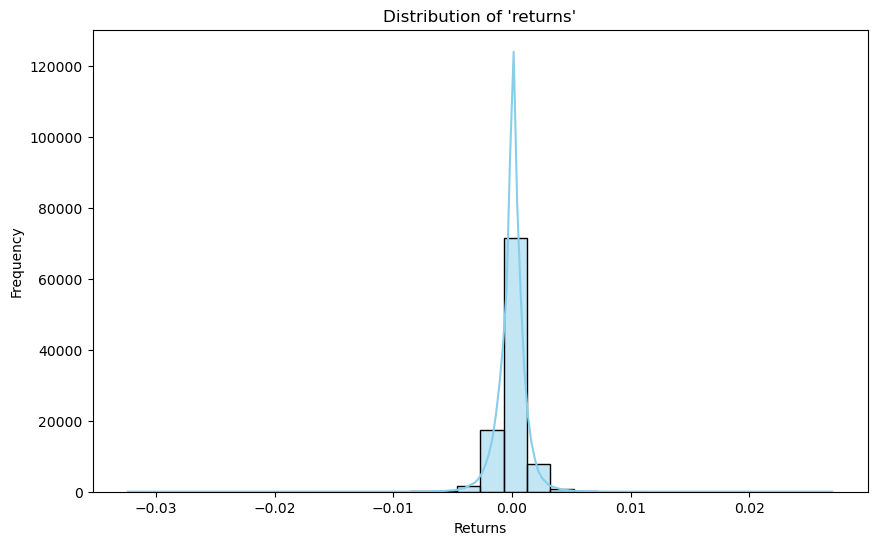

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(scaled_df['next_returns'], kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [193]:
# Use qcut to divide 'returns' into 11 equal-sized groups and label them from 1 to 11
scaled_df['return_group'] = pd.qcut(scaled_df['next_returns'], q=11, labels=range(1, 11 + 1))

# Display the DataFrame with the new 'return_group' column
scaled_df.groupby('return_group').size()

return_group
1      9069
2      9068
3      9069
4      9068
5     11375
6      6762
7      9068
8      9068
9      9069
10     9068
11     9069
dtype: int64

In [194]:
scaled_df.head()

,timestamp,next_returns,0,1,2,3,4,5,6,7,...,78,79,80,81,82,83,84,85,86,return_group
0,1.710043e+09,0.000469,1.175554,1.169361,1.166684,1.174490,1.177944,1.178584,1.127700,1.173568,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.844617,-0.038490,-0.850626,8
1,1.710044e+09,0.004662,1.180902,1.172387,1.165424,1.175656,1.184128,1.184768,1.130915,1.175466,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.849031,0.143302,-0.850626,11
2,1.710044e+09,-0.000940,1.194473,1.179747,1.166990,1.181360,1.223507,1.221610,1.135969,1.178766,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.842379,0.234219,-0.850626,2
3,1.710044e+09,0.000676,1.204951,1.185714,1.170500,1.184321,1.224214,1.224860,1.147909,1.181140,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.822544,0.327894,-0.850626,9
4,1.710044e+09,0.000396,1.215668,1.191955,1.175831,1.187735,1.225942,1.226588,1.158895,1.183663,...,-0.06369,0.001281,0.043685,-0.00708,0.006333,-0.001007,-0.778122,0.304202,-0.850626,8


In [195]:
from sklearn.model_selection import train_test_split

train_size = 0.8  # 80% for training and 20% for testing

split_index = int(len(scaled_df) * train_size)

train_df = scaled_df[:split_index]
test_df = scaled_df[split_index:]

X_train = train_df.drop(columns=['next_returns', 'return_group']).to_numpy()
y_train = train_df[['timestamp','return_group']].to_numpy()

X_test = test_df.drop(columns=['next_returns', 'return_group']).to_numpy()
y_test = test_df[['timestamp','return_group']].to_numpy()

In [196]:
TRAIN_TIMESTAMPS = X_train[:, 0]

TEST_TIMESTAMPS = X_test[:, 0]


In [197]:
#remove timestamps
X_train = X_train[:, 1:]
y_train = y_train[:, 1:].flatten()

X_test = X_test[:, 1:]
y_test = y_test[:, 1:].flatten()


In [198]:
# Set print options for better readability
np.set_printoptions(precision=2, suppress=True)

# Pretty print the array
print("Formatted NumPy Array:")
print(X_train)
print(y_train)
print(X_test)
print(y_test)

Formatted NumPy Array:
[[ 1.18  1.17  1.17 ... -0.84 -0.04 -0.85]
 [ 1.18  1.17  1.17 ... -0.85  0.14 -0.85]
 [ 1.19  1.18  1.17 ... -0.84  0.23 -0.85]
 ...
 [-1.05 -0.93 -0.92 ...  0.68 -1.32  1.18]
 [-1.05 -0.94 -0.93 ...  0.45 -1.26  1.18]
 [-1.05 -0.94 -0.95 ...  0.3  -1.18  1.18]]
[ 8. 11.  2. ...  8. 11.  5.]
[[-1.05 -0.95 -0.96 ...  0.22 -1.1   1.18]
 [-1.05 -0.95 -0.97 ...  0.17 -1.01  1.18]
 [-1.05 -0.95 -0.97 ...  0.16 -0.92  1.18]
 ...
 [-0.13 -0.08 -0.07 ...  0.86 -1.49  1.18]
 [-0.13 -0.09 -0.07 ...  0.7  -1.47  1.18]
 [-0.13 -0.09 -0.08 ...  0.62 -1.41  1.18]]
[ 8.  3. 11. ... 11. 10. 10.]


#**DECISION TREE MODEL**

In [199]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_squared_error


# Train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree}')
print(classification_report(y_test, y_pred_tree))

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate for Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.1103202846975089
              precision    recall  f1-score   support

         1.0       0.09      0.11      0.10      1336
         2.0       0.10      0.10      0.10      1689
         3.0       0.09      0.09      0.09      1783
         4.0       0.12      0.11      0.12      2064
         5.0       0.18      0.16      0.17      2874
         6.0       0.10      0.08      0.09      1529
         7.0       0.11      0.10      0.10      2022
         8.0       0.10      0.10      0.10      1812
         9.0       0.10      0.10      0.10      1832
        10.0       0.09      0.11      0.10      1636
        11.0       0.11      0.13      0.12      1374

    accuracy                           0.11     19951
   macro avg       0.11      0.11      0.11     19951
weighted avg       0.11      0.11      0.11     19951

Random Forest Accuracy: 0.15006766578116384
              precision    recall  f1-score   support

         1.0       0.13      0.21      0.16  

In [200]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(criterion='entropy', random_state=0)  # Use 'entropy' for cross-entropy as impurity
# clf.fit(X_train[:, 1:], y_train[:, 1])

# # Verify model training
# print("Model trained successfully!")
# print("Number of features:", clf.n_features_in_)
# print("Tree depth:", clf.get_depth())
import numpy as np
from sklearn.tree import DecisionTreeClassifier


# Now fit the model using the shifted features and target
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)  # Fit the model on the new data

# Verify model training
print("Model trained successfully!")
print("Number of features:", clf.n_features_in_)
print("Tree depth:", clf.get_depth())


Model trained successfully!
Number of features: 87
Tree depth: 45


In [201]:
y_pred_rf

array([11.,  1.,  1., ...,  1., 11.,  8.])

In [202]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.2f}')

# Generate a confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report_dt = classification_report(y_test, y_pred)
# print("Classification Report:\n", class_report)

In [203]:

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print(f'Accuracy: {accuracy:.2f}')

# Generate a confusion y_pred_rf
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf)

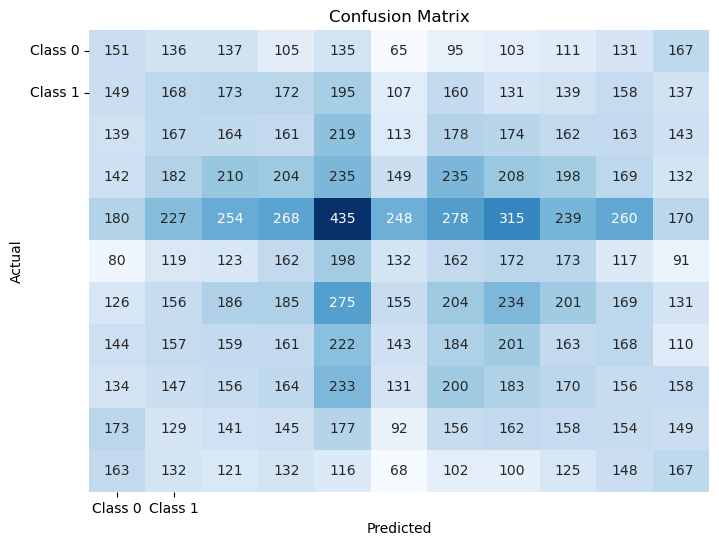

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


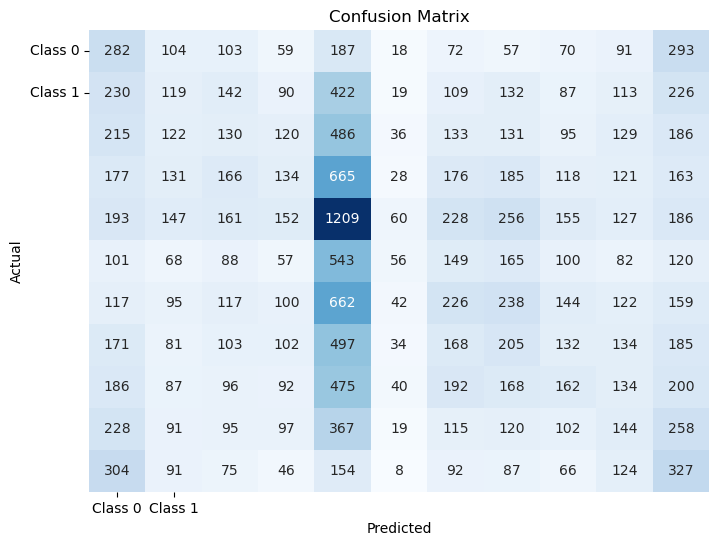

In [205]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


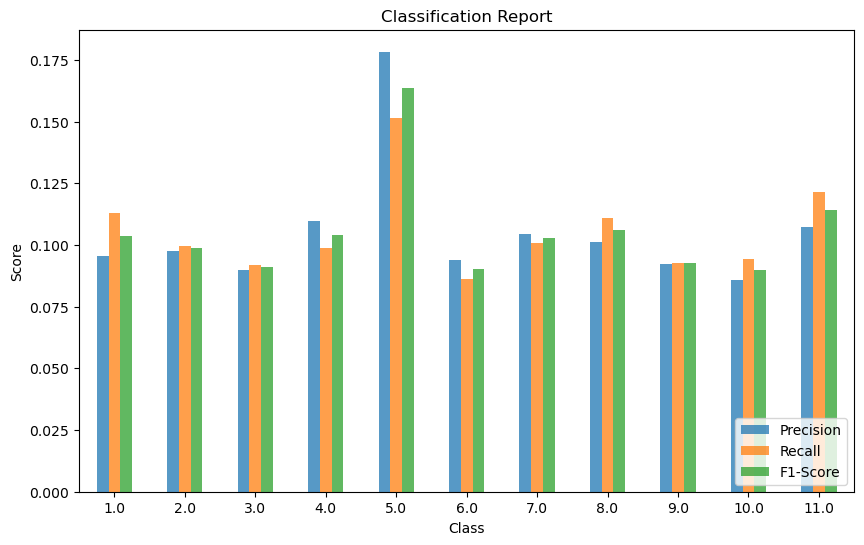

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, f1-score for each class
class_labels = [key for key in class_report.keys() if key not in ('accuracy', 'macro avg', 'weighted avg')]  # Get only class labels
precision = [class_report[label]['precision'] for label in class_labels]
recall = [class_report[label]['recall'] for label in class_labels]
f1 = [class_report[label]['f1-score'] for label in class_labels]

# Create a DataFrame for the classification report
class_report_df = pd.DataFrame({
    'Class': class_labels,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Set the class as index
class_report_df.set_index('Class', inplace=True)

# Plot the classification report
plt.figure(figsize=(10, 6))
class_report_df.plot(kind='bar', alpha=0.75, ax=plt.gca())
plt.title("Classification Report")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


In [207]:
y_pred_rf

array([11.,  1.,  1., ...,  1., 11.,  8.])

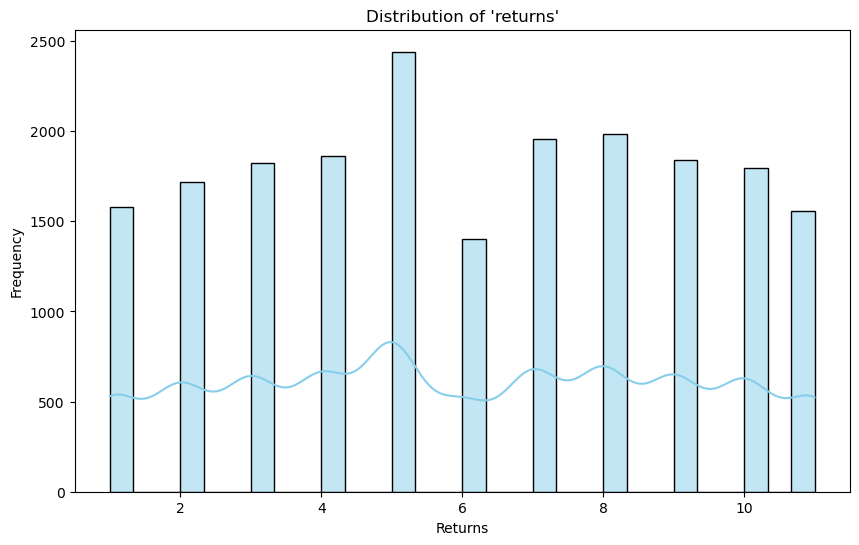

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'returns'
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, bins=30, color='skyblue')  # histogram with KDE overlay
plt.title("Distribution of 'returns'")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [209]:
u = pd.DataFrame((y_pred == y_test))
acc = u.value_counts().loc[True][0] / (u.value_counts().loc[True][0] + u.value_counts().loc[False][0])
print(f"correct group prediction = {acc}")

correct group prediction = 0.10776402185354117


In [210]:
resid = y_pred - y_test
# resid

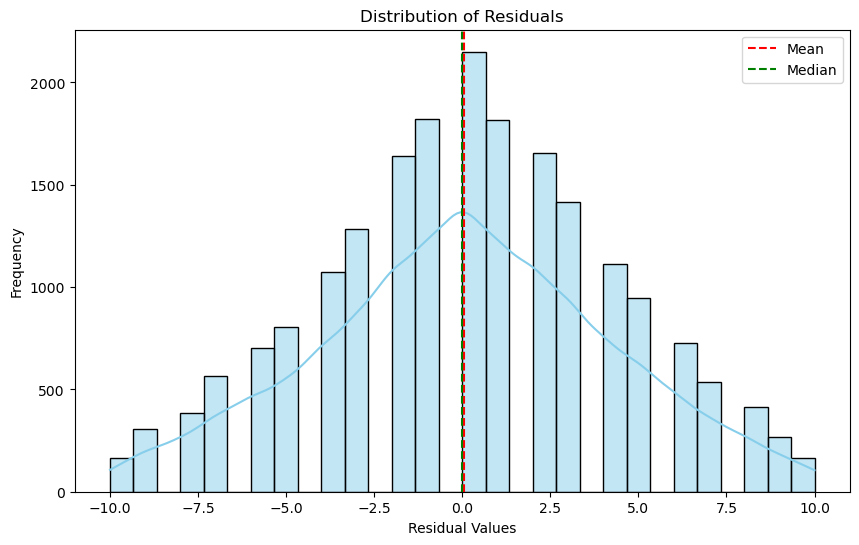

In [211]:
# Plotting the distribution of 'resid'
plt.figure(figsize=(10, 6))
sns.histplot(resid, kde=True, bins=30, color='skyblue')  # Histogram with KDE overlay
plt.title("Distribution of Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Frequency")
plt.axvline(x=np.mean(resid), color='r', linestyle='--', label='Mean')  # Mean line
plt.axvline(x=np.median(resid), color='g', linestyle='--', label='Median')  # Median line
plt.legend()
plt.show()

In [212]:
import seaborn as sns
import pandas as pd

# Create a DataFrame for Seaborn
results_df = pd.DataFrame({
    'True': y_test,   # Actual labels
    'Predicted': y_pred,     # Predicted labels
    'timestamp' : TEST_TIMESTAMPS
})

# # Melt the DataFrame for Seaborn
# melted_results = results_df.melt(var_name='Type', value_name='Class')

# # Create a count plot
# plt.figure(figsize=(10, 6))
# sns.countplot(data=melted_results, x='Class', hue='Type', palette=['blue', 'red'])
# plt.title('Count of True vs Predicted Class Labels')
# plt.xlabel('Class Labels')
# plt.ylabel('Count')
# plt.legend(title='Type')
# plt.show()



In [213]:
results_df['resid'] = resid
results_df.head()

,True,Predicted,timestamp,resid
0,8.0,10.0,1.724167e+09,2.0
1,3.0,2.0,1.724167e+09,-1.0
2,11.0,1.0,1.724167e+09,-10.0
3,1.0,10.0,1.724167e+09,9.0
4,3.0,11.0,1.724168e+09,8.0


In [214]:
prices = prices[['timestamp', 'close']].set_index('timestamp')
prices.head()

,close
timestamp,
1.710029e+09,68469.45
1.710029e+09,68468.90
1.710029e+09,68474.69
1.710029e+09,68459.92
1.710029e+09,68458.29


In [215]:
import numpy as np
class Portfolio:
     def __init__(self):
        self.values = pd.DataFrame(columns = ['timestamp', 'value'])
        self.values.set_index('timestamp', inplace=True)
        # higher specificity store of value through time (pandas)

        # integer of current value
        self.value =  0

class TradingStrategy:
    def __init__(self, predictions, prices):
        self.predictions = predictions  # 2D array with [timestamp, predicted_category]
        self.prices = prices  # pd dataframe with prices

        self.position = None
        self.trades = pd.DataFrame(columns=['timestamp', 'price', 'action'])
        self.portfolio = Portfolio()



    def execute_trade(self, timestamp, price, action):
        row = pd.DataFrame({'timestamp': [timestamp], 'price': [price], 'action':[action]})
        self.trades = pd.concat([self.trades, row], ignore_index=True)

        if action == 'buy':
            values_row = pd.DataFrame({'timestamp': [timestamp], 'value': [-(price)]})
        elif action == 'sell':
            values_row = pd.DataFrame({'timestamp': [timestamp], 'value': [price]})
        else:
            max_index = self.portfolio.values['value'].idxmax()
            prev_value = self.portfolio.values.loc[max_index, 'value']

            values_row = pd.DataFrame({'timestamp': [timestamp], 'value': [prev_value]})

        values_row.set_index('timestamp', inplace=True)
        self.portfolio.values = pd.concat([self.portfolio.values, values_row], ignore_index=True)



    def monitor(self):
        high = 11
        low = 1

        for _, row in self.predictions.iterrows():
            timestamp = row['timestamp']
            return_category = row['Predicted']
            price = self.prices.loc[timestamp]['close']
            if return_category >= high and self.position != 'buy':
                self.position = 'buy'
                self.execute_trade(timestamp, price, 'buy')

            # Sell if return category is below 3
            elif return_category <= low and self.position != 'sell':
                self.position = 'sell'
                self.execute_trade(timestamp, price, 'sell')

            # hold if mid and on buy position
            elif return_category > low and return_category < high and self.position == 'buy':
                self.execute_trade(timestamp, price, 'hold')

        return self.trades

    
    def getPortfolio(self):
        value = []

        count = 0
        
        for t in self.trades:
            time = t[0]
            price = self.prices.loc[time]['close']
            
            
            if count == 0:
                prev = -(price)
            else:
                prev = value[count - 1][1]

            if t[1] == "buy":
                curr = prev - price
                value.append((time, curr))

            elif t[1] == "sell":
                curr = prev + price 
                value.append((time, curr))

            count+=1
                
        return value

    def get_net_profit(self):
        for i in range(len(self.trades)):
            trade = self.trades.iloc[i]
            price = trade['price']
            if trade['action'] == 'buy':
                self.portfolio.value -= price
            elif trade['action'] == 'sell':
                self.portfolio.value += price
        return self.portfolio.value



strategy = TradingStrategy(results_df[['timestamp', 'Predicted']], prices)
trades = strategy.monitor()
strategy.get_net_profit()
# aggregated_return = trading_strategy.calculate_aggregated_return()

# ts = pd.DataFrame(trades)
# trading_strategy.trades




61720.83999999993

In [221]:
strategy.trades

,timestamp,price,action
0,1.724167e+09,59097.48,sell
1,1.724168e+09,59040.71,buy
2,1.724168e+09,59014.96,hold
3,1.724168e+09,59049.89,sell
4,1.724170e+09,58914.76,buy
...,...,...,...
9621,1.727739e+09,63357.21,hold
9622,1.727739e+09,63271.40,hold
9623,1.727740e+09,63157.30,sell
9624,1.727740e+09,63161.83,buy


In [222]:
values = strategy.portfolio.values
buys = strategy.trades[strategy.trades['action'] == 'buy']
sells = strategy.trades[strategy.trades['action'] == 'sell']

In [223]:
strategy_prices = strategy.prices
# Convert the timestamp in strategy_prices to datetime
strategy_prices.reset_index(inplace=True)
strategy_prices['timestamp'] = pd.to_datetime(strategy_prices['timestamp'], unit='s')


In [224]:
# Convert timestamp in buys and sells to datetime
buys['timestamp'] = pd.to_datetime(buys['timestamp'], unit='s')
sells['timestamp'] = pd.to_datetime(sells['timestamp'], unit='s')

# Now merge buys and sells with strategy_prices
df_buys = strategy_prices.merge(buys, how="left", on="timestamp", suffixes=('', '_buy'))
df_final = df_buys.merge(sells, how="left", on="timestamp", suffixes=('', '_sell'))
df_final


,index,timestamp,close,price,action,price_sell,action_sell
0,0,2024-03-10 00:03:00,68469.45,NaN,NaN,NaN,NaN
1,1,2024-03-10 00:04:00,68468.90,NaN,NaN,NaN,NaN
2,2,2024-03-10 00:08:00,68474.69,NaN,NaN,NaN,NaN
3,3,2024-03-10 00:09:00,68459.92,NaN,NaN,NaN,NaN
4,4,2024-03-10 00:10:00,68458.29,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
99837,99837,2024-09-30 23:44:00,63002.95,NaN,NaN,NaN,NaN
99838,99838,2024-09-30 23:45:00,63043.40,NaN,NaN,NaN,NaN
99839,99839,2024-09-30 23:46:00,63161.83,63161.83,buy,NaN,NaN
99840,99840,2024-09-30 23:47:00,63215.71,NaN,NaN,63215.71,sell


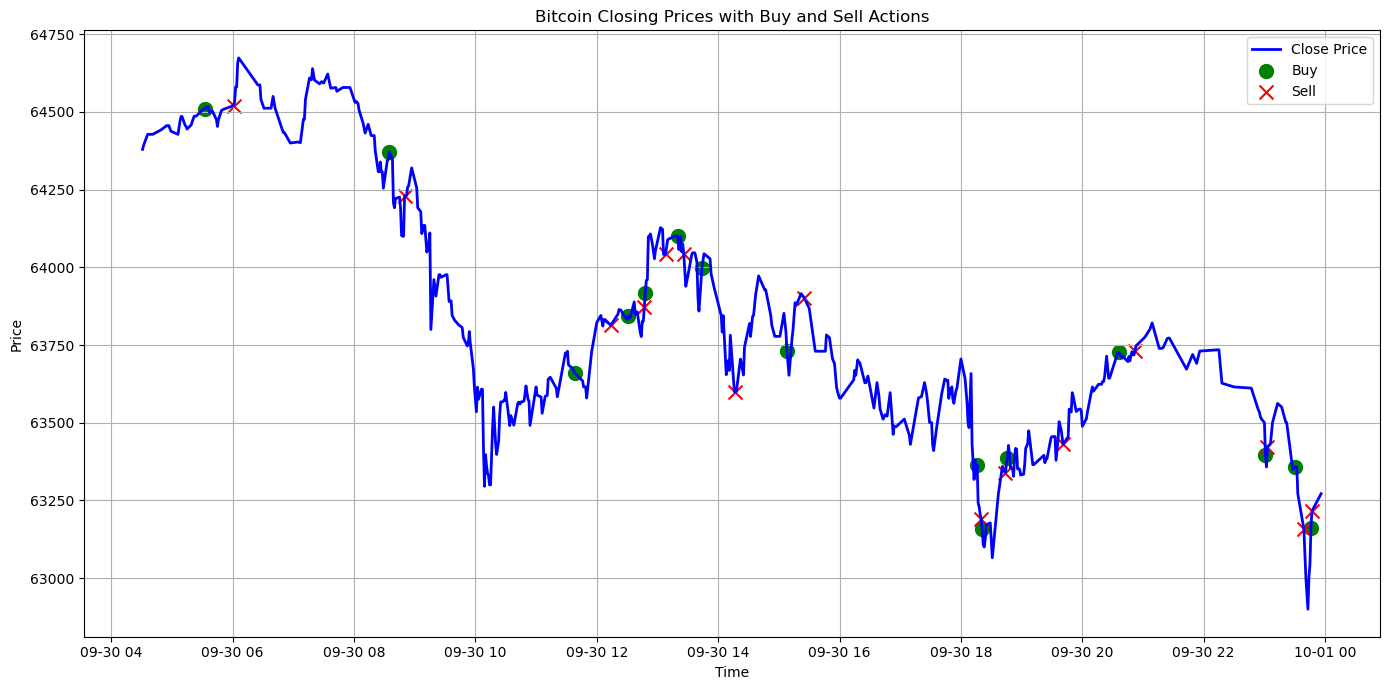

In [226]:

# Ensure that the timestamp is the index for better plotting
try:
    df_final.set_index('timestamp', inplace=True)
except: 
    pass

df_viz = df_final.iloc[-500:]
# Plotting
plt.figure(figsize=(14, 7))

# Plot closing prices
plt.plot(df_viz.index, df_viz['close'], label='Close Price', color='blue', linewidth=2)

# Marking buys and sells
buys = df_viz[df_final['action'] == 'buy']
sells = df_viz[df_final['action_sell'] == 'sell']

plt.scatter(buys.index, buys['close'], marker='o', color='green', label='Buy', s=100)
plt.scatter(sells.index, sells['close'], marker='x', color='red', label='Sell', s=100)

# Adding titles and labels
plt.title('Bitcoin Closing Prices with Buy and Sell Actions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()